# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [36]:
# atualmente, este é meu bloco fixo de importações
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests as rq
%matplotlib inline

base = pd.read_csv("SINASC_RO_2019.csv") # carregando a Base

base.dropna(subset= ["APGAR5"])
base.shape

(27028, 69)

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [24]:
# categorização dos índices em uma nova coluna
base.loc[base["APGAR5"] <= 3, "APGAR5_cat"] = "asfixia severa"
base.loc[(base["APGAR5"] > 3) & (base["APGAR5"] <= 5), "APGAR5_cat"] = "asfixia moderada"
base.loc[(base["APGAR5"] > 5) & (base["APGAR5"] < 8), "APGAR5_cat"] = "asfixia leve"
base.loc[base["APGAR5"] >= 8, "APGAR5_cat"] = "normal"

base.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,APGAR5_cat
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

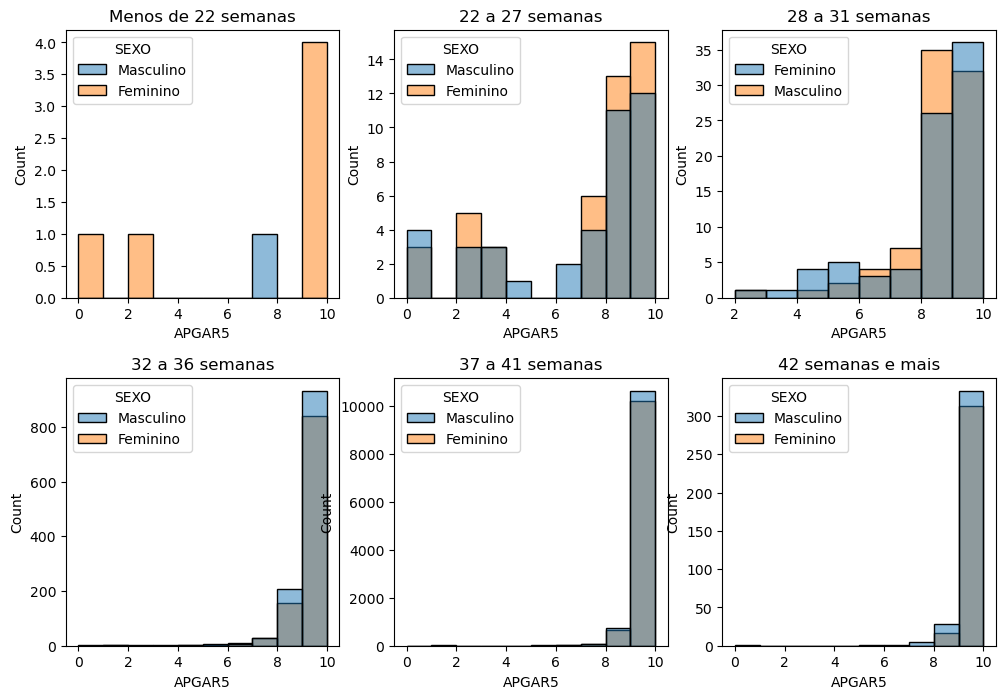

In [25]:
# criando bases de dados filtradas para cada tempo de gestação
gestacao1 = base[base["GESTACAO"] == "Menos de 22 semanas"]
gestacao2 = base[base["GESTACAO"] == "22 a 27 semanas"]
gestacao3 = base[base["GESTACAO"] == "28 a 31 semanas"]
gestacao4 = base[base["GESTACAO"] == "32 a 36 semanas"]
gestacao5 = base[base["GESTACAO"] == "37 a 41 semanas"]
gestacao6 = base[base["GESTACAO"] == "42 semanas e mais"]

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

sns.histplot(ax=axs[0, 0], x="APGAR5", hue="SEXO", data=gestacao1, binwidth= 1).set_title("Menos de 22 semanas")
sns.histplot(ax=axs[0, 1], x="APGAR5", hue="SEXO", data=gestacao2, binwidth= 1).set_title("22 a 27 semanas")
sns.histplot(ax=axs[0, 2], x="APGAR5", hue="SEXO", data=gestacao3, binwidth= 1).set_title("28 a 31 semanas")
sns.histplot(ax=axs[1, 0], x="APGAR5", hue="SEXO", data=gestacao4, binwidth= 1).set_title("32 a 36 semanas")
sns.histplot(ax=axs[1, 1], x="APGAR5", hue="SEXO", data=gestacao5, binwidth= 1).set_title("37 a 41 semanas")
sns.histplot(ax=axs[1, 2], x="APGAR5", hue="SEXO", data=gestacao6, binwidth= 1).set_title("42 semanas e mais")

fig.subplots_adjust(hspace=0.3)

plt.show()

# a coloração azul escuro no gráfico representa dados sobrepostos de Masculino e Feminino

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [26]:
tabela_cruzada = pd.crosstab(base["GESTACAO"], base["APGAR5"])
tabela_cruzada.head(6)

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [16]:
tabela_cruzada_pct = tabela_cruzada.apply(lambda x: round(x/x.sum(), 4), axis=1)
tabela_cruzada_pct.head(6)

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.0824,0.0000,0.0941,0.0706,0.0118,0.0000,0.0235,0.1176,0.2824,0.2235,0.0941
28 a 31 semanas,0.0000,0.0000,0.0123,0.0062,0.0309,0.0432,0.0432,0.0679,0.3765,0.3395,0.0802
32 a 36 semanas,0.0009,0.0009,0.0009,0.0009,0.0036,0.0049,0.0076,0.0251,0.1620,0.5850,0.2081
37 a 41 semanas,0.0002,0.0009,0.0001,0.0002,0.0003,0.0009,0.0020,0.0067,0.0629,0.6023,0.3234
42 semanas e mais,0.0014,0.0000,0.0000,0.0000,0.0000,0.0014,0.0014,0.0072,0.0630,0.6060,0.3195
Menos de 22 semanas,0.1429,0.0000,0.1429,0.0000,0.0000,0.0000,0.0000,0.1429,0.0000,0.4286,0.1429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

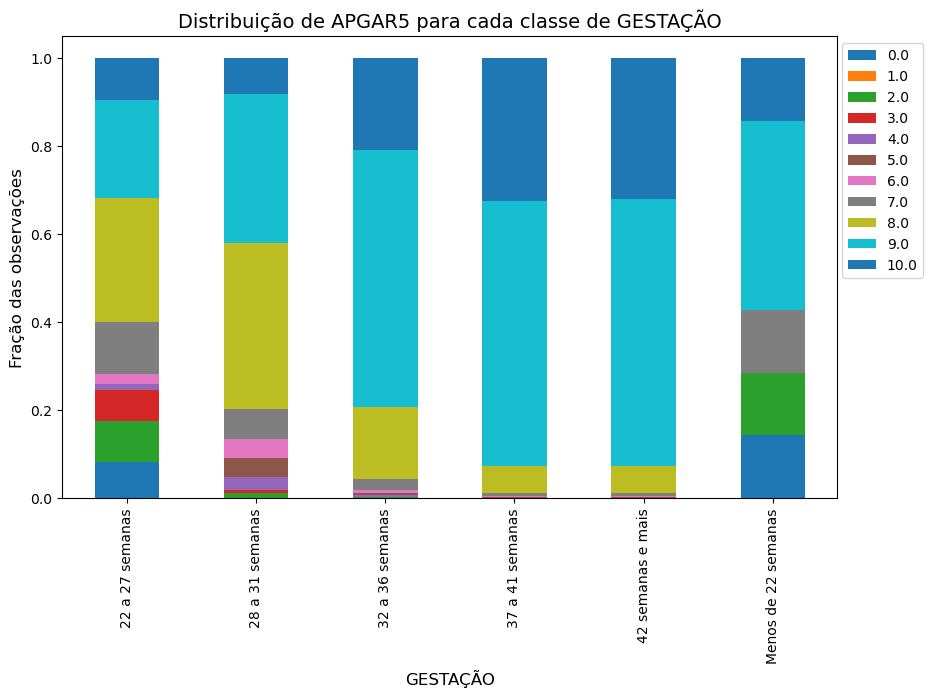

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

tabela_cruzada_pct.plot(kind="bar", stacked=True, ax=ax) # empilhados facilita a visualização neste caso, fato testado

ax.set_title("Distribuição de APGAR5 para cada classe de GESTAÇÃO", fontsize=14)
ax.set_xlabel("GESTAÇÃO", fontsize=12)
ax.set_ylabel("Fração das observações", fontsize=12)

# linha necessária para corrigir a localização da legenda, tive de pesquisar como fazer
ax.legend(loc="upper right", bbox_to_anchor=(1.12, 1))

plt.show()

De fato, as categorias menores que 37 semanas apresentam uma maior variedade de APGAR5, ou seja, uma possível relação com as categorias de APGAR5 "asfixia severa", "moderada" e "leve"; quais surgem com maior incidência antes de 37 semanas de gestação.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

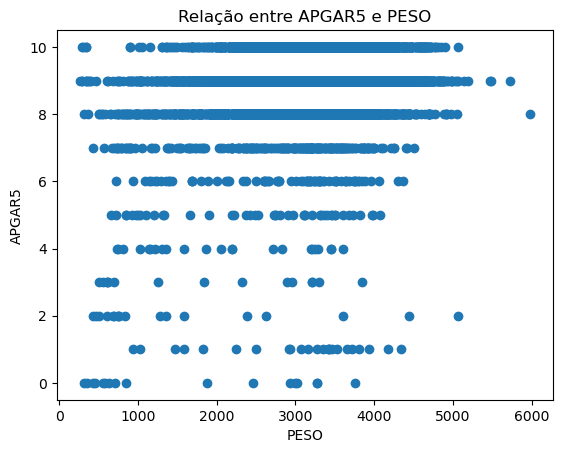

In [39]:
# Plotando um gráfico de dispersão de AGPAR5 em relação a PESO
plt.scatter(base["PESO"], base["APGAR5"])

plt.title("Relação entre APGAR5 e PESO")
plt.xlabel("PESO")
plt.ylabel("APGAR5")

plt.show()

# como não fica claro, trarei outra abordagem, mais específica.

In [41]:
# Calculando o coeficiente de correlação de Pearson entre APGAR5 e PESO
corr = pd.Series(base["APGAR5"]).corr(base["PESO"], method="pearson")

print(f"Coeficiente de correlação de Pearson: {corr:.3f}; onde varia entre -1 e 1, e um valor de 0 indica que não há associaçãos.")

Coeficiente de correlação de Pearson: 0.168, onde varia entre -1 e 1, e um valor de 0 indica que não há associaçãos.
